In [1]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')
df = pd.read_csv('C:/Users/User/Desktop/10/data/raw_analyst_ratings.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', utc=True)

df.head()


[nltk_data] Downloading package punkt to C:\Users\User/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


<span style="font-size:32px; font-weight:bold;">Obtain Basic Statistics for Textual Lengths</span>


In [10]:
df['headline_length'] = df['headline'].apply(len)

headline_length_stats = df['headline_length'].describe()

print("Headline Length Statistics:")
print(headline_length_stats)


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


<span style="font-size:32px; font-weight:bold;">Count the Number of Articles Per Publisher</span>


In [11]:

articles_per_publisher = df['publisher'].value_counts()

print("Number of Articles Per Publisher:")
print(articles_per_publisher)


Number of Articles Per Publisher:
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: publisher, Length: 1034, dtype: int64


<span style="font-size:32px; font-weight:bold;">Analyze the Publication Dates</span>


In [13]:
print(df['date'].dtype)

object


In [17]:
print(df['date'].head())


0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object


In [18]:
df['date'] = df['date'].astype(str)


In [19]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
df['date'] = df['date'].dt.tz_localize(None)

In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df['date'].dtype)
print(df['date'].head())


datetime64[ns]
0   2020-06-05 14:30:54
1   2020-06-03 14:45:20
2   2020-05-26 08:30:07
3   2020-05-22 16:45:06
4   2020-05-22 15:38:59
Name: date, dtype: datetime64[ns]


In [24]:

df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts['full_date'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))

monthly_counts.to_csv('monthly_article_counts.csv', index=False)

print("Monthly article counts have been saved to 'monthly_article_counts.csv'.")
print(monthly_counts.head())


Monthly article counts have been saved to 'monthly_article_counts.csv'.
   year  month  count  full_date
0  2009      2      1 2009-02-01
1  2009      4      3 2009-04-01
2  2009      5     12 2009-05-01
3  2009      6     40 2009-06-01
4  2009      7     75 2009-07-01


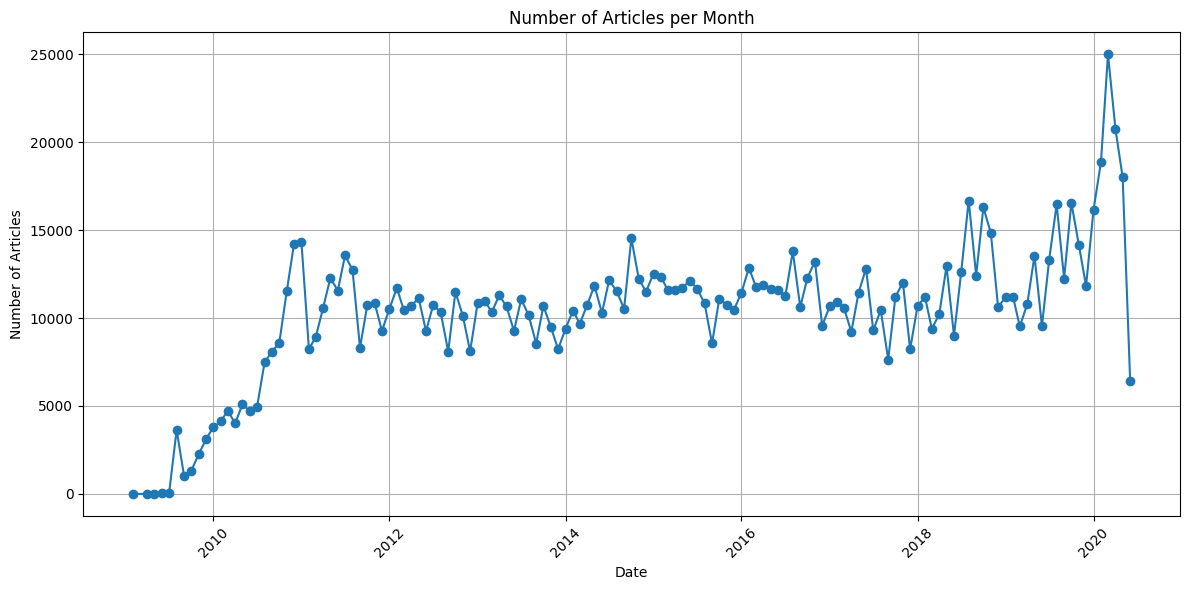

In [26]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts['datetime'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))

monthly_counts.to_csv('monthly_article_counts.csv', index=False)

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['datetime'], monthly_counts['count'], marker='o', linestyle='-')
plt.title('Number of Articles per Month')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('articles_per_month.png')

plt.show()


<span style="font-size:32px; font-weight:bold;">Text Analysis(Sentiment analysis & Topic Modeling)</span>

<span style="font-size:27px; font-weight:bold;">Sentiment Analysis Using TextBlob</span>

In [27]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['headline'].apply(get_sentiment)

sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)


neutral     934914
positive    341178
negative    131236
Name: sentiment, dtype: int64


<span style="font-size:27px; font-weight:bold;">Perform Topic Modeling</span>

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

df['processed_headline'] = df['headline'].apply(preprocess)

texts = df['processed_headline'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


<span style="font-size:32px; font-weight:bold;">Time Series Analysis</span>

<span style="font-size:27px; font-weight:bold;">Publication Frequency Over Time</span>

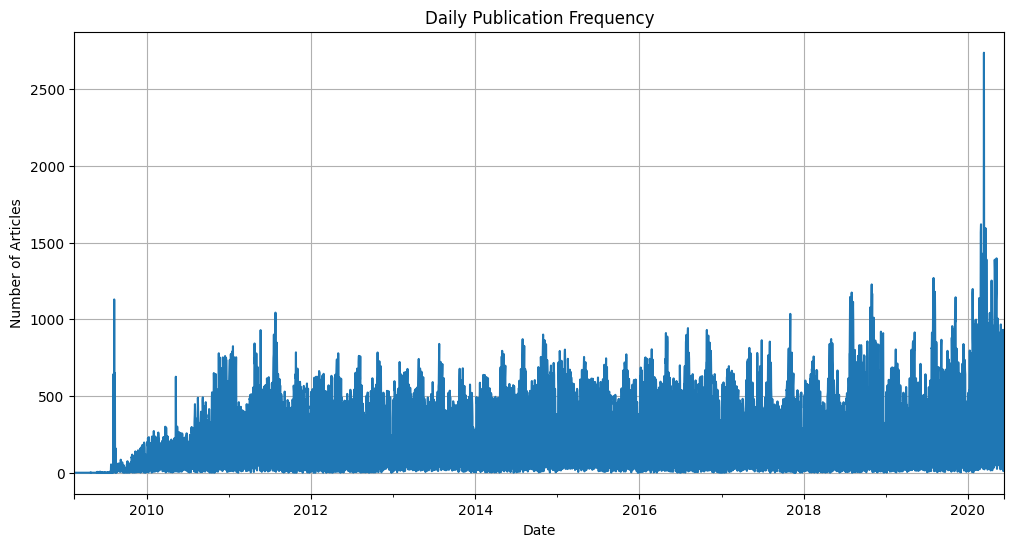

In [2]:
import matplotlib.pyplot as plt

df.set_index('date', inplace=True)

daily_counts = df.resample('D').size()

plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


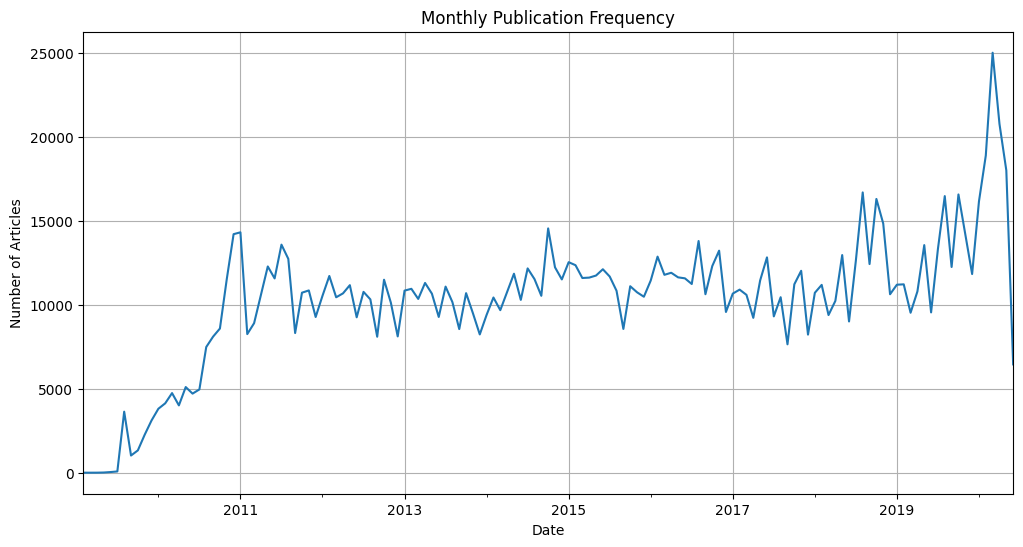

In [3]:
monthly_counts = df.resample('M').size()
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Monthly Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


<span style="font-size:32px; font-weight:bold;"> Identify Spikes and Trends</span>

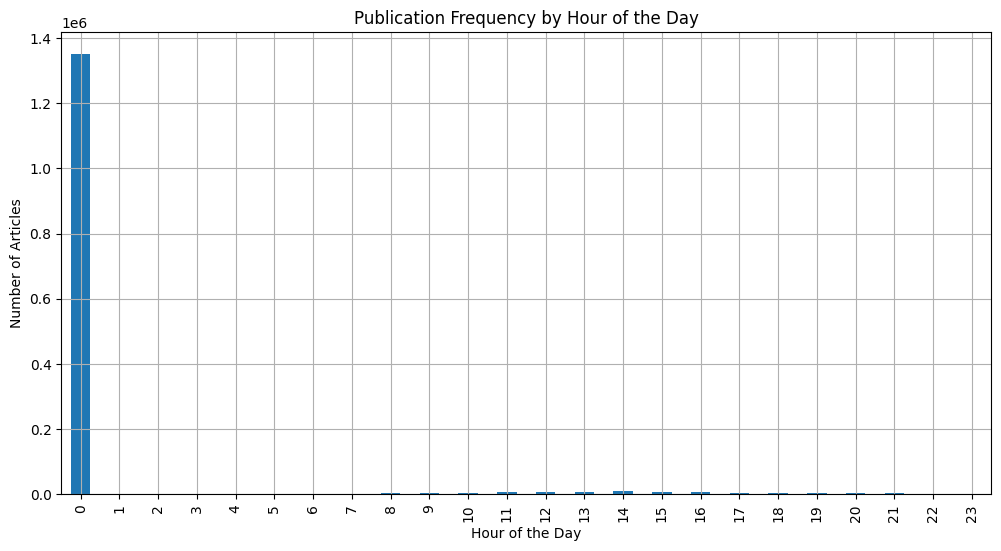

In [4]:
df['hour'] = df.index.hour
hourly_counts = df.groupby('hour').size()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Publication Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


<span style="font-size:32px; font-weight:bold;">Publisher Analysis</span>

<span style="font-size:27px; font-weight:bold;">Publisher Contribution Analysis</span>

Top Publishers:
 Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: publisher, dtype: int64


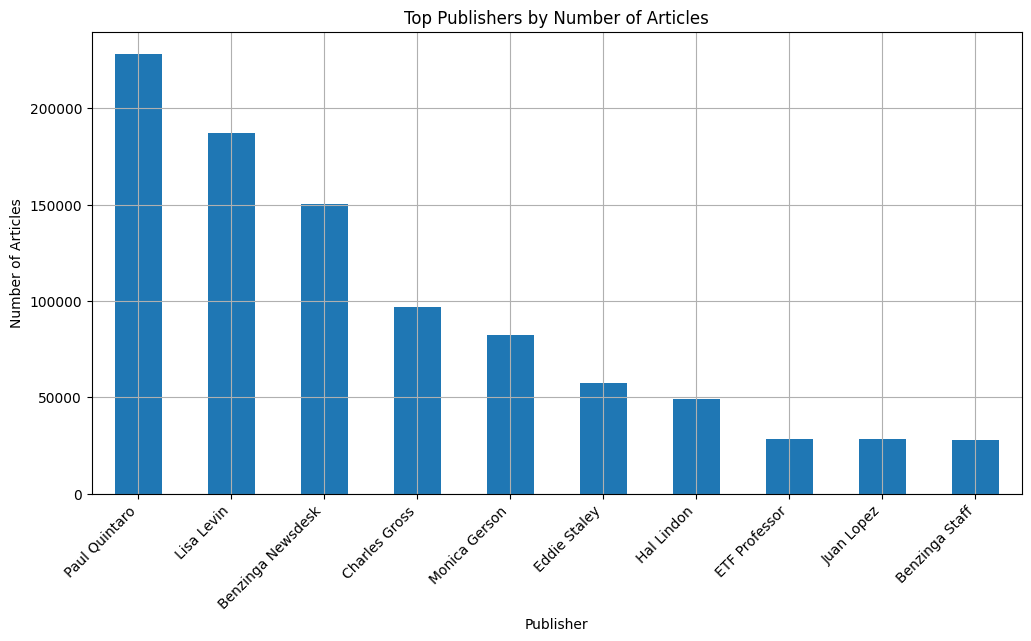

In [2]:
publisher_counts = df['publisher'].value_counts()

top_publishers = publisher_counts.head(10)
print("Top Publishers:\n", top_publishers)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar')
plt.title('Top Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [3]:
top_publishers_names = top_publishers.index
sample_headlines = df[df['publisher'].isin(top_publishers_names)]

for publisher in top_publishers_names:
    print(f"\nHeadlines from {publisher}:")
    print(sample_headlines[sample_headlines['publisher'] == publisher]['headline'].head(5))



Headlines from Paul Quintaro:
209    Agilent Reports Purchase Of Genohm, No Terms D...
212    UPDATE: Alnylam, Agilent Deal Has Initial Term...
213    Alnylam Pharma 8-K Shows Co. Entered Manufactu...
225    Agilent Reports Purchase Of Luxcel Biosciences...
233    Agilent Sees Q1 Adj. EPS $0.55-$0.57 vs $0.60 ...
Name: headline, dtype: object

Headlines from Lisa Levin:
2                       71 Biggest Movers From Friday
3        46 Stocks Moving In Friday's Mid-Day Session
9          10 Biggest Price Target Changes For Friday
10    30 Stocks Moving in Friday's Pre-Market Session
15                Earnings Scheduled For May 21, 2020
Name: headline, dtype: object

Headlines from Benzinga Newsdesk:
7     Agilent Technologies shares are trading higher...
13    Agilent Technologies shares are trading higher...
14    Agilent Technologies Q2 Adj. EPS $0.71 Beats $...
18    Pershing Square 13F Shows Fund Raises Stake In...
20    Shares of several healthcare companies are tra...
Name: headl

<span style="font-size:27px; font-weight:bold;">Email Domain Analysis</span>

Top Domains:
 benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: domain, dtype: int64


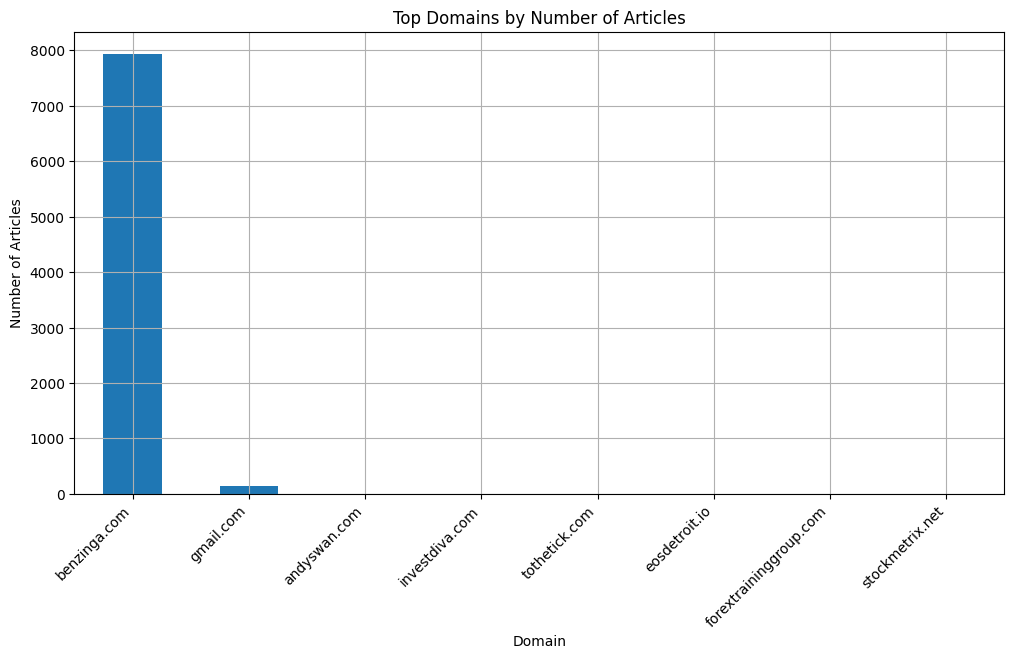

In [ ]:
#email domain
def extract_domain(email):
    return email.split('@')[-1] if '@' in email else None

df['domain'] = df['publisher'].apply(extract_domain)

domain_counts = df['domain'].value_counts()

top_domains = domain_counts.head(10)
print("Top Domains:\n", top_domains)

plt.figure(figsize=(12, 6))
top_domains.plot(kind='bar')
plt.title('Top Domains by Number of Articles')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()
